In [2]:
import os
# меняем строку на путь до корневой папки проекта
full_path = r'D:\СОБЕС\2022\НИИ_системной_биологии\Поиск_клик_в_неориентированном_неполном_графе'
os.chdir(full_path)
from NotOrientedGraphModule import NotOrientedGraph
from CliqueFinderClass import CliqueFinder

from tqdm import notebook
import networkx as nx
import pandas as pd

In [3]:
print(f'Текущая рабочая директория:\n {os.getcwd()}')
print('\nПеречень файлов и папок в корневом каталоге проекта: \n')
print("\n".join([elem for elem in sorted(os.listdir(),key=len)]))

Текущая рабочая директория:
 D:\СОБЕС\2022\НИИ_системной_биологии\Поиск_клик_в_неориентированном_неполном_графе

Перечень файлов и папок в корневом каталоге проекта: 

.git
.idea
Алгоритмы
__pycache__
TestClassesFile.py
CliqueFinderClass.py
NotOrientedGraphModule.py
ПЛАН выполнения задания.txt
find_klicks_in_inoriented_graph_notebook.ipynb


In [4]:
# doc-строка класса NotOrientedGraph
print(NotOrientedGraph.__doc__)


    Данный класс создает неориентированный граф.
    С заданным количеством вершин (N)
    Если параметр <complete> == 'yes',
    то создает полный граф,
    если он равен 'no' - неполный граф.
    Lower & Upper Bounds - границы (нижняя и верхняя соотв.)
    интервала значений для матрицы смежности (веса ребер графа!)
    (все ребра, веса которых выходят за его границы - отсекаются).
    Далее матрица смежности используется для построения
    неориентированного графа заданной полноты (атрибут "complete").
    В случае графа с одинаковыми весами ребер (аттрибут <weighted> == 'no')
    им всем присваивается значение 1!
    


In [5]:
# структура класса NotOrientedGraph
#print(NotOrientedGraph.__dict__)

1 ЭТАП - ПОСТРОЕНИЕ ГРАФА!!!

In [6]:
nodes_num = 1111

In [7]:
%%time
# создаем "заготовку" НЕВЗВЕШЕННОГО графа
raw_graph = NotOrientedGraph(N=nodes_num,
                 complete='no',
                 lower_bound=0.3,
                 upper_bound=0.5,
                 weighted='no')

#test_graph = raw_graph.build_graph()
#test_graph.set_N(-1)
#test_graph.set_lower_bound(0.9)
#test_graph.set_complete(876)
#print(test_graph.__dict__)
#print(test_graph.edges)
#print(test_graph.nodes.data())
#print([test_graph[node] for node in test_graph])
#print(test_graph[4])

# отрисовка всего исходного графа
# получение графа в виде объекта класса NetworkX
#graph = NotOrientedGraph.draw_graph(raw_graph)
graph = NotOrientedGraph.build_graph(raw_graph)

Wall time: 181 ms


In [8]:
#print([graph[node] for node in graph])
# вывод только узлов графа в виде списка - 
# для окрашивания найденных клик!!!
#list(graph.nodes())

In [9]:
# создаем "заготовку" ВЗВЕШЕННОГО графа
another_raw_graph = NotOrientedGraph(N=nodes_num,
                 complete='no',
                 lower_bound=0.1,
                 upper_bound=0.9,
                 weighted='yes')
#another_graph = NotOrientedGraph.draw_graph(another_raw_graph)

2 ЭТАП - НАХОЖДЕНИЕ КЛИК В ГРАФЕ

ОТ И БОЛЕЕ (КОЛИЧЕСТВО ВЕРШИН НА ОДНУ НАЙДЕННУЮ КЛИКУ)

In [10]:
%%time
found_cliques_from_class = CliqueFinder(graph=graph,
                                        method='default',
                                        clique_vertex_num=4,
                                        vertex_num_equals='no').find_cliques_sorted()

В исходном графе с общим количеством вершин, равном <1111> (шт.)

Найдено клик: <54> (шт.)

Найденные клики НЕ ПЕРЕСЕКАЮТСЯ по вершинам исходного графа.
ОК!
Уникальных вершин: <216> (шт.)
Wall time: 165 ms


In [11]:
found_cliques_from_class_inverted = found_cliques_from_class[::-1]
#found_cliques_from_class_inverted

СТРОГО ЗАДАННОЕ КОЛИЧЕСТВО ВЕРШИН НА ОДНУ НАЙДЕННУЮ КЛИКУ

In [12]:
%%time
found_cliques_from_class_equal_vertex_num = CliqueFinder(graph=graph,
                                        method='default',
                                        clique_vertex_num=4,
                                        vertex_num_equals='yes').find_cliques_sorted()

В исходном графе с общим количеством вершин, равном <1111> (шт.)

Найдено клик: <54> (шт.)

Найденные клики НЕ ПЕРЕСЕКАЮТСЯ по вершинам исходного графа.
ОК!
Уникальных вершин: <216> (шт.)
Wall time: 167 ms


3 ЭТАП - НАХОЖДЕНИЕ КЛИК И ИХ ВИЗУАЛИЗАЦИЯ

НАХОЖДЕНИЕ КЛИК В ГРАФЕ С ПОСЛЕДУЮЩИМ ПОЛУЧЕНИЕМ РИСУНКА!


для этого устанавливаем количество вершин исходного графа поменьше

В исходном графе с общим количеством вершин, равном <55> (шт.)

Найдено клик: <3> (шт.)

Найденные клики НЕ ПЕРЕСЕКАЮТСЯ по вершинам исходного графа.
ОК!
Уникальных вершин: <9> (шт.)

 ВЕРШИНЫ НАЙДЕННЫХ КЛИК В ИСХОДНОМ ГРАФЕ:
[[44, 52, 47], [4, 41, 16], [0, 20, 31]]
Wall time: 33.8 ms


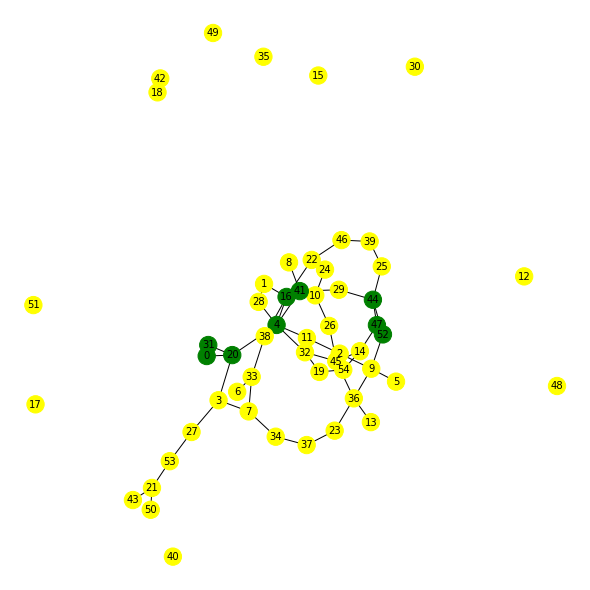

In [41]:
%%time
vertex_num = 55
# создаем "заготовку" НЕВЗВЕШЕННОГО графа
raw_graph_visualization = NotOrientedGraph(N=vertex_num,
                 complete='no',
                 lower_bound=0.3,
                 upper_bound=0.5,
                 weighted='no')
graph_visualization = NotOrientedGraph.build_graph(raw_graph_visualization)
found_cliques_visualization = CliqueFinder(graph=graph_visualization,
                                        method='default',
                                        clique_vertex_num=3,
                                        vertex_num_equals='no',
                                        show_cliques_on_graph='yes'
                                       ).find_cliques_sorted()
print(f'\n ВЕРШИНЫ НАЙДЕННЫХ КЛИК В ИСХОДНОМ ГРАФЕ:\n{found_cliques_visualization}')

ЧЕРНОВИКИ!!!

In [14]:
#def bronk2(R, P, X, g):
#    if not any((P, X)):
#        yield R
#    for v in P[:]:
#        R_v = R + [v]
#        P_v = [v1 for v1 in P if v1 in search_neighbours(v, g)]
#        X_v = [v1 for v1 in X if v1 in search_neighbours(v, g)]
#        for r in bronk2(R_v, P_v, X_v, g):
#            yield r
#        P.remove(v)
#        X.append(v)
#def search_neighbours(v, g):
#    return [i for i, n_v in enumerate(g[v]) if n_v]

In [15]:
#print([another_graph[node] for node in another_graph])

In [16]:
#def bron_kerbosch_max_by_inclusion(m):

#    results = []

#    def check(candidates, wrong):
#        for i in wrong:
#            q = True
#            for j in candidates:
#                if m[i][j]:
#                    q = False
#                    break
#            if q: return False
#        return True

#    def extend(compsub, candidates, wrong):

#        while candidates and check(candidates, wrong):

#            v = candidates[0]
#            compsub.append(v)

#            new_candidates = [ i for i in candidates if not m[i][v] and i != v ]
#            new_wrong = [ i for i in wrong if not m[i][v] and i != v ]

#            if not new_candidates and not new_wrong:
#                results.append(list(compsub))
#            else:
#                extend(compsub, new_candidates, new_wrong)

#            candidates.remove(v)
#            compsub.remove(v)
#            wrong.append(v)

#    extend([], list(range(len(m))), [])

#    return results

In [17]:
#for i in another_graph[1]:
#    print(i)
#    print(another_graph[i])
#    print()

In [18]:
#search_neighbours(0, another_graph)

In [19]:
#sys.setrecursionlimit(50000)
#print(sys.getrecursionlimit())